In [4]:
#Regular
import numpy as np
import pandas as pd
from numpy.random import randn
from pandas import Series, DataFrame

#Stats
from scipy import stats

#Plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation'

In [6]:
dataset = randn(25)

(0, 1)

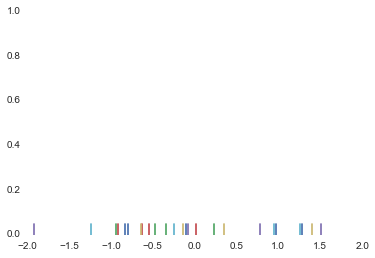

In [7]:
sns.rugplot(dataset)
plt.ylim(0,1)

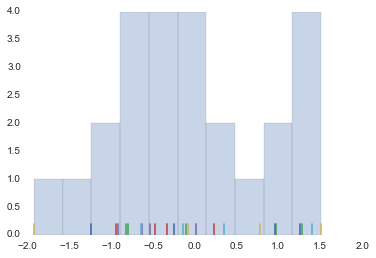

In [9]:
plt.hist(dataset,alpha=0.3)
sns.rugplot(dataset)

(0, 1)

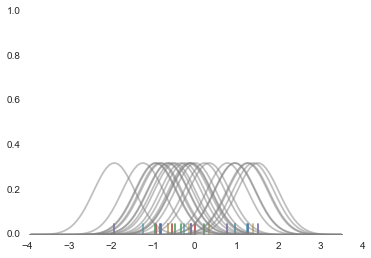

In [12]:
sns.rugplot(dataset)

x_min = dataset.min() - 2 
x_max = dataset.max() + 2

x_axis = np.linspace(x_min,x_max,100)

#Practical estimation of the bandwidth
bandwidth = ( (4*dataset.std()**5) / (3*len(dataset)))** 0.2

kernel_list = []

for data_point in dataset:
    #create a kernel for each point and append it to the kernel list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    Kernel = kernel / kernel.max()
    kernel = kernel * 0.4
    
    plt.plot(x_axis,kernel,color='grey',alpha=0.5)
    
plt.ylim(0,1)
    

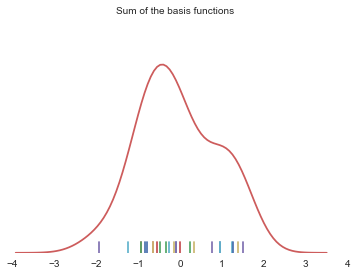

In [13]:
sum_of_kde = np.sum(kernel_list,axis=0)

fig = plt.plot(x_axis,sum_of_kde,color='indianred')

sns.rugplot(dataset)

plt.yticks([])

plt.suptitle("Sum of the basis functions")

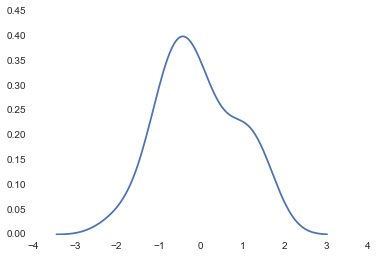

In [14]:
sns.kdeplot(dataset)

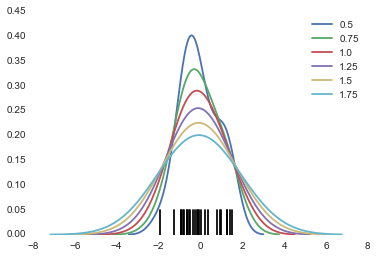

In [15]:
sns.rugplot(dataset,color='black')

for bw in np.arange(0.5,2,0.25):
    sns.kdeplot(dataset,bw=bw,lw=1.8,label=bw)
    

In [16]:
url = "http://en.wikipedia.org/wiki/Kernel_%28statistics%29""

SyntaxError: EOL while scanning string literal (<ipython-input-16-f29066151300>, line 1)

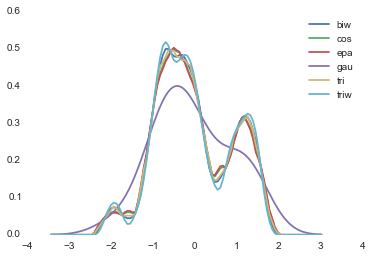

In [18]:
kernel_options = ['biw','cos','epa','gau','tri','triw']

for kern in kernel_options:
    sns.kdeplot(dataset,kernel = kern, label=kern)

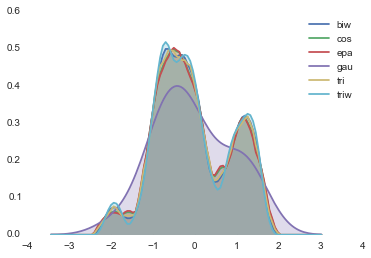

In [19]:
for kern in kernel_options:
    sns.kdeplot(dataset,kernel = kern, label=kern, shade = True)

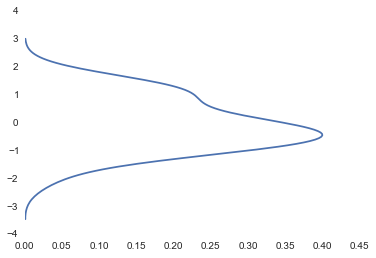

In [20]:
sns.kdeplot(dataset,vertical = True)

In [21]:
url = 'http://en.wikipedia.org/wiki/Cumulative_distribution_function'

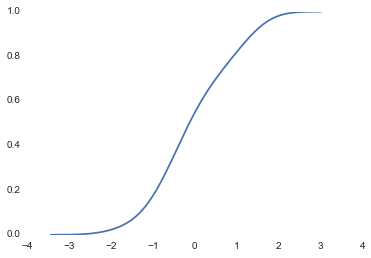

In [22]:
sns.kdeplot(dataset,cumulative=True)

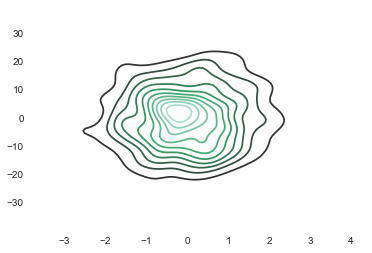

In [26]:
mean = [0,0]

cov = [[1,0],[0,100]]

dataset2 = np.random.multivariate_normal(mean,cov,1000)

dframe = pd.DataFrame(dataset2,columns=list('XY'))

sns.kdeplot(dframe)

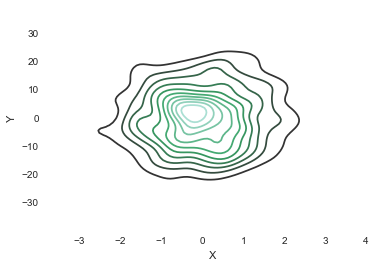

In [28]:
sns.kdeplot(dframe.X,dframe.Y)

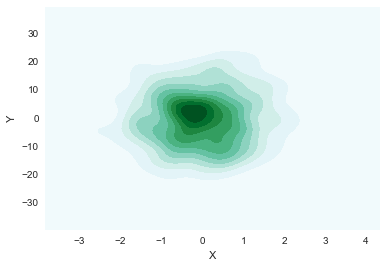

In [29]:
sns.kdeplot(dframe.X,dframe.Y,shade=True)

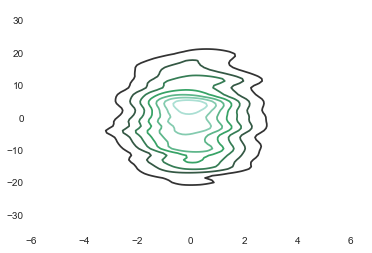

In [30]:
sns.kdeplot(dframe,bw=1)

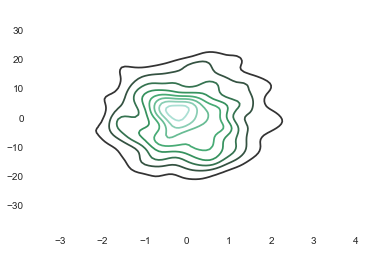

In [31]:
sns.kdeplot(dframe,bw='silverman')

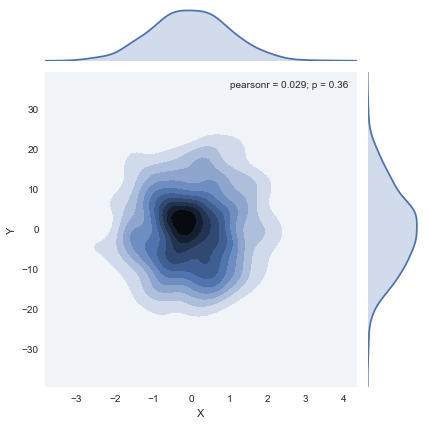

In [32]:
sns.jointplot('X','Y',dframe,kind='kde')